In [3]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'Company': ['A', 'A', 'B', 'B', 'B', 'C', 'C'],
              'event_type':['new', 'route', 'receive', 'execute', 'route', 'receive', 'execute'],
             'event_id': ['110', '120', '200', '210', '220', '300', '310'],
             'prior_event_id': [np.nan, '110', np.nan, '120', '210', np.nan, '300'],
             'route_id': [np.nan, 'foo', 'foo', np.nan, 'bar', 'bar', np.nan]}
             )

In [4]:
df['event_sub'] = df.groupby([df.Company, df.event_type]).cumcount()+1
df['event'] = df.Company + ' ' + df.event_type + ' ' + df.event_sub.astype(str)  

replace_dict_event = dict(df[['event_id', 'event']].values)
df['source'] = df['prior_event_id'].apply(lambda x: replace_dict_event.get(x) if replace_dict_event.get(x) else np.nan )
df['target'] = df['event_id'].apply(lambda x: replace_dict_event.get(x) if replace_dict_event.get(x) else np.nan )

replace_dict_rtd = dict(df[df.event_type == 'route'][['route_id', 'event']].values)
df.loc[df.event_type == 'receive', 'source'] = df[df.event_type == 'receive']['route_id'].apply(lambda x: replace_dict_rtd.get(x))

In [5]:
df['event'] = df.Company + '\n' + df.event_type + ' ' + df.event_sub.astype(str) 


{}

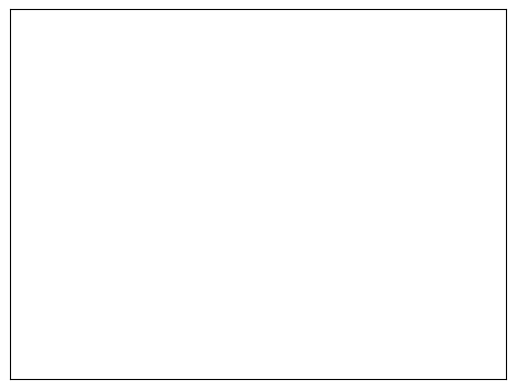

In [8]:
import networkx as nx
# dummy data
a = np.random.randint(0,2,size=(10,10))

# G = nx.from_numpy_matrix(a)
G = nx.Graph(matrix=a)

pos = nx.spring_layout(G)

# draw without labels, then draw labels separately
nx.draw_networkx(G, pos=pos, with_labels=False)

# draw_networkx_labels takes as keyword argument a dictionary called labels
# which links the id of a node to a name.
# you can create one using dictionary comprehension like so:
nodenames = {n:'firstline \n secondline \n thirdline' for n in G.nodes()}

# and then draw:
nx.draw_networkx_labels(G, pos=pos, labels=nodenames)

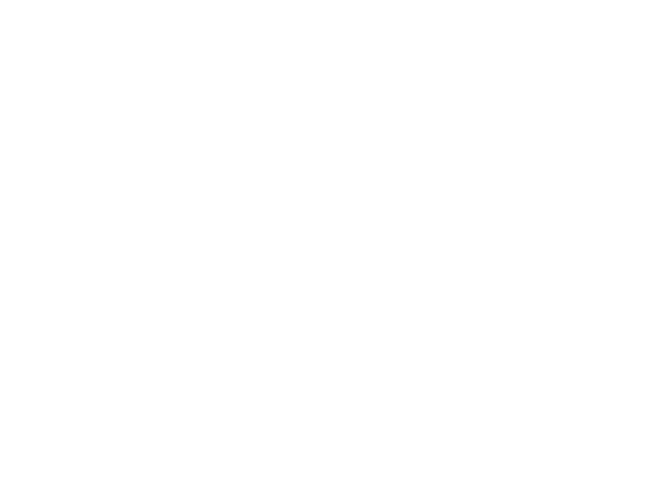

In [11]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt 
 
# Define the adjacency matrix 
A = np.array([[0, 1, 1, 0], 
              [1, 0, 1, 1], 
              [1, 1, 0, 1], 
              [0, 1, 1, 0]]) 
 
# Create a graph from the adjacency matrix 
G = nx.Graph(matrix=A) 
 
# Draw the graph 
nx.draw(G, with_labels=True) 
 
# Show the plot 
plt.show() 